<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: 
Exposed input of features (x1,x2,x3,...)
### Hidden Layer: 
Intermediary neuronal computations between inner and output layer
### Output Layer: 
Outputs final value computed by hypothesis
### Neuron: 
Cells in the brain that communicate through electrical impulses. Receives input and transmits output if a threshold is met. 
### Weight: 
Parameters of a model 
### Activation Function: 
Computation of input wire that leads to the output wire by specific neuron 
### Node Map: 
Visual diagram of the architecture of "topology" of our neural network (like a flow chart of paths)
### Perceptron: 
A supervised learning model of binary classifiers enabled by back-propogation. May be single or multi layered. 

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

In a perceptron, input signals arrive to the input layer of a neural network, each parameterized with a weight and an additional offset ("bias"). These are computed in neuron nodes of the input layer by an activation function which determinine the output signal of the input layer. The activation function is modeled by a logistic regression using the sigmoid (most common), tanh, step, or retu functions to provide an output between 0 and 1. The output of the input layer may then be followed by a series of hidden layers which may be a set of hyperparameters using similar activation functions. This proceeds until the final computation is obtained by the output layer which deteremines the final output signal as a 0 to 1 probability for classification.  

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [2]:
import numpy as np
np.random.seed(78)

In [3]:
df['ones']=np.ones(4)
df['ones']=df['ones'].astype('int')
df

,x1,x2,y,ones
0,0,0,1,1
1,1,0,1,1
2,0,1,1,1
3,1,1,0,1


In [4]:
inputs = df[['x1','x2','ones']]
correct_outputs = df[['y']]

In [5]:
weights = 2 * np.random.random((3,1)) - 1
weights

array([[-0.90363754],
       [ 0.36192603],
       [ 0.59739214]])

In [6]:
#Defining a sigmoid function for my perceptron
def sigmoid(x):
    return 1/ (1 + np.exp(-x))
sigmoid(0)

#Defining sigmoid derivative function, this is a basic way to get back prop
def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

In [7]:
weighted_sum = np.dot(np.array(inputs), weights)
activated_output = sigmoid(weighted_sum)
print(weighted_sum)
print(activated_output)

[[ 0.59739214]
 [-0.30624541]
 [ 0.95931816]
 [ 0.05568062]]
[[0.64505944]
 [0.42403146]
 [0.72298527]
 [0.51391656]]


In [8]:
#Loop through 10k epochs to allow the perceptron to backprop and correct its weights
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Calc error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-11.84042561]
 [-11.84042561]
 [ 17.80950276]]
Output after training
[[0.99999998]
 [0.99744966]
 [0.99744966]
 [0.00281143]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [9]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [143]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

scaler = MinMaxScaler()    # See U2-LinearModels-M4
X = diabetes[feats]
Y = diabetes[['Outcome']]

In [144]:
# Normalized data
scaled_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
scaled_df.head()

/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [145]:
X = scaled_df[feats]
Y = diabetes[['Outcome']]

In [186]:
X[:-1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,0.550000


In [146]:
# Get baseline score
from sklearn.metrics import accuracy_score

majority_class = diabetes['Outcome'].mode()[0]
accuracy_score(Y,[majority_class]*len(Y))

0.6510416666666666

In [238]:
# Code largely borrowed from lecture notes
# This code should probably utilize a sigmoid activation function
# or something but I'm too lazy and this can be added later, whatever

class Perceptron(object):
    def __init__(self, rate=0.01, iters = 10):
        self.rate = rate 
        self.iters = iters 
        
    def fit(self, X, y):
        '''Fits the training data
        X =  Training Vectors 
        X.shape : [#samples , #features ]
        y = Target values 
        y.shape = [# samples]
        '''
        
        #initalize weights to random (-1,1)
        self.weights = 2 * np.random.random((1+X.shape[1])) - 1
        #initialize errors of every iteration
        self.errors = []
               
        
        #loop till iteration limit is met 
        for i in range (self.iters):
            errs = 0 
            # for every row of x and matching y 
            for xi, target in zip(X,y):      
                # Get error (will be 0 or 1)
                error = target - self.predict(xi)
                
                # Make adjustment equal to error multiplied by learning rate.
                adjustment = self.rate * error
                
                # Update weights 
                self.weights[:-1] += adjustment * xi
                self.weights[-1] += adjustment    #bias
                
                # Count errors
                errs += int(adjustment != 0.0)  

            #Save error of every iteration
            self.errors.append(errs)
        return self
    
    def net_input(self, X):
        """Calculate net input
        aka weighted sum
        """
        return np.dot(X, self.weights[:-1]) + self.weights[-1]
    
    def sigmoid(x):
        return (1 / (1 + np.exp(-x)))
    
    def sigmoid_derivative(x):
        sx = sigmoid(x)
        return sx * (1 - sx)

    def predict(self, X):
        """Return class label after unit step
        If probability is over 0.5, then classify as 1 
        otherwise, classify as 0
        """
        
        return np.where(self.net_input(X) >= 0.5, 1, 0)

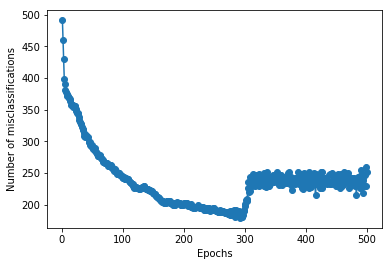

In [239]:
import matplotlib.pyplot as plt

pn = Perceptron(0.0002,500);
pn.fit(X.values,Y.values);
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show();

In [237]:
print("Accuracy =", (X.shape[0]-pn.errors[-1])/X.shape[0])    

Accuracy =  0.6783854166666666


## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?